In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import load_iris
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

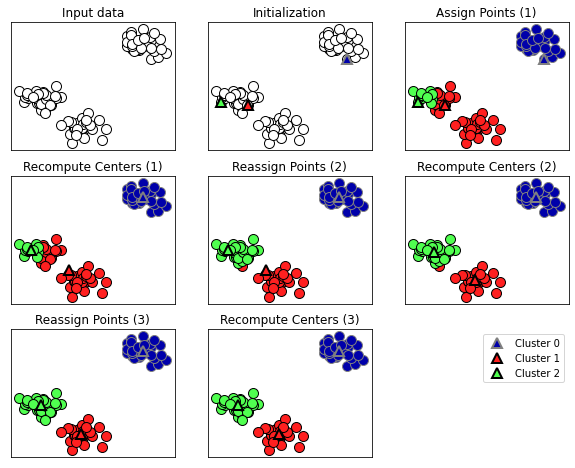

In [2]:
mglearn.plots.plot_kmeans_algorithm()

In [3]:
from sklearn.cluster import  KMeans
X,y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [4]:
print(kmeans.labels_)

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [5]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


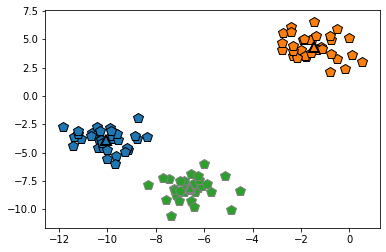

In [6]:
mglearn.discrete_scatter(X[:,0],X[:,1], kmeans.labels_, markers='p')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
                         [0,1,2],
                         markers='^', markeredgewidth=2)

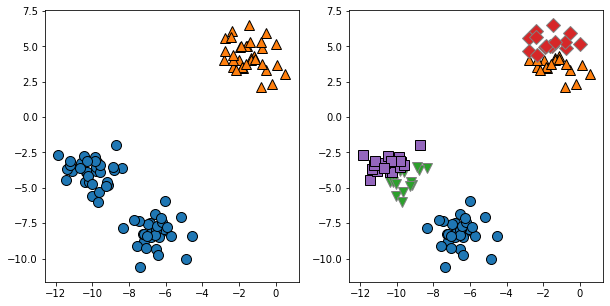

In [7]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1], assignments, ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1], assignments, ax=axes[1])

# clustering 실패

Text(0.5, 0, 'feature 1')

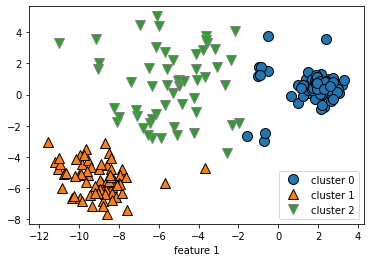

In [8]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.,2.5,0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:,0],X_varied[:,1],y_pred)
plt.legend(['cluster 0','cluster 1','cluster 2'], loc='best')
plt.xlabel('feature 0')
plt.xlabel('feature 1')

Text(0.5, 0, 'feature 1')

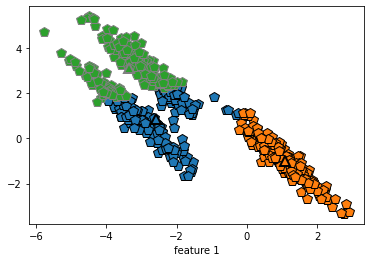

In [9]:
X,y = make_blobs(n_samples=600, random_state=170)
rng = np.random.RandomState(74)
transformation = rng.normal(size=(2,2))
X=np.dot(X, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

mglearn.discrete_scatter(X[:,0],X[:,1], kmeans.labels_, markers='p')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
                         [0,1,2],
                         markers='^', markeredgewidth=2)
plt.xlabel('feature 0')
plt.xlabel('feature 1')

Text(0.5, 1.0, 'badly scaled data')

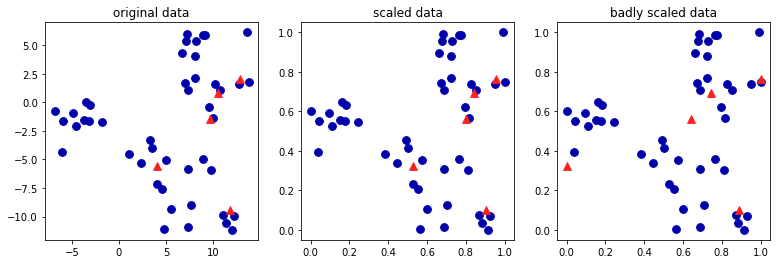

In [10]:

from sklearn.preprocessing import MinMaxScaler
X,_ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

X_train, X_test = train_test_split(X,random_state=5, test_size=.1)

fig, axes = plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1], c=mglearn.cm2.colors[0], label='train set',s=60)
axes[0].scatter(X_test[:,0],X_test[:,1], marker='^', c=mglearn.cm2.colors[1], label='test set',s=60)
axes[0].set_title('original data')

scaler = MinMaxScaler()
# scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1], c=mglearn.cm2.colors[0], label='train set',s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1], marker='^', c=mglearn.cm2.colors[1], label='test set',s=60)
axes[1].set_title('scaled data')


test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1], c=mglearn.cm2.colors[0], label='train set',s=60)
axes[2].scatter(X_test_scaled_badly[:,0],X_test_scaled[:,1], marker='^', c=mglearn.cm2.colors[1], label='test set',s=60)
axes[2].set_title('badly scaled data')

In [11]:

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(X_scaled.shape)
print(X_pca.shape)

(569, 30)
(569, 2)


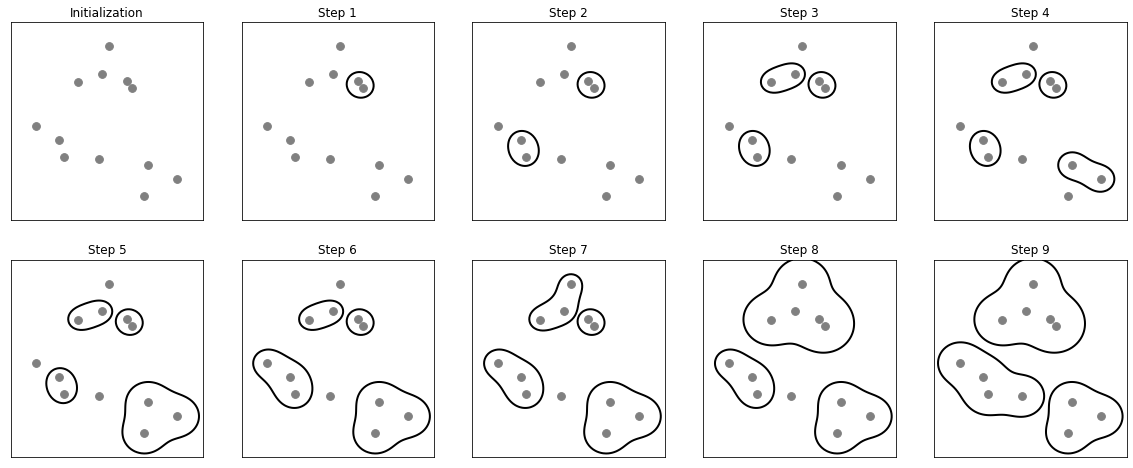

In [12]:
mglearn.plots.plot_agglomerative_algorithm()

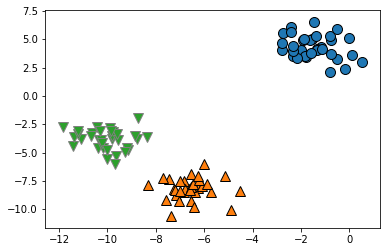

In [14]:
from sklearn.cluster import AgglomerativeClustering

X,y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:,0],X[:,1], assignment)


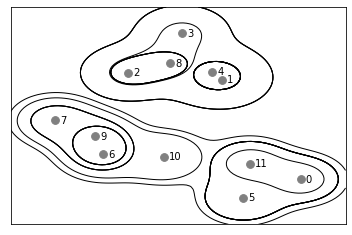

In [16]:
mglearn.plots.plot_agglomerative()

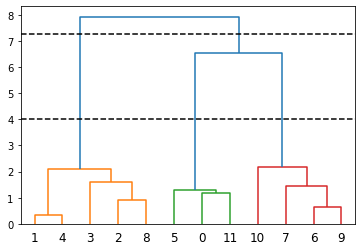

In [18]:
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)

linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4,4], '--', c='k')

In [19]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples = 12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print(clusters)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


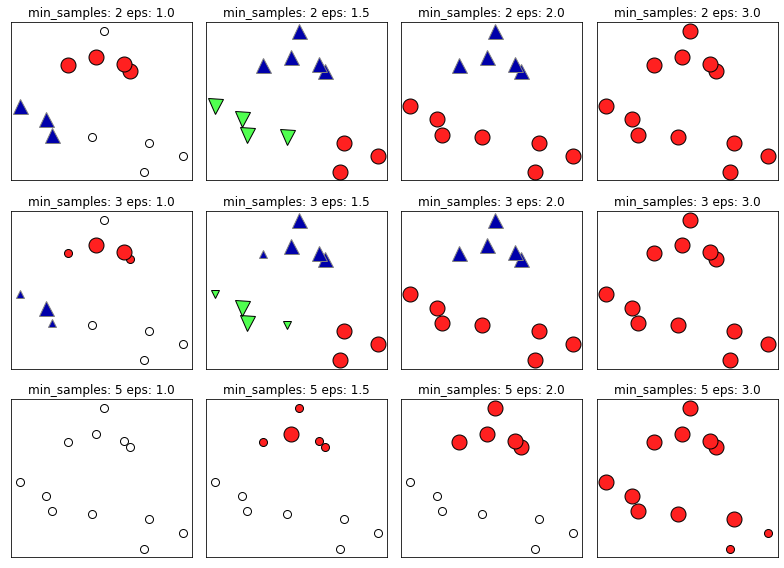

In [20]:
mglearn.plots.plot_dbscan()

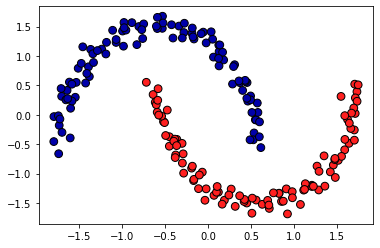

In [23]:
X, y = make_moons(random_state=0, n_samples = 200, noise=0.05)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0],X_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60, edgecolor='black')

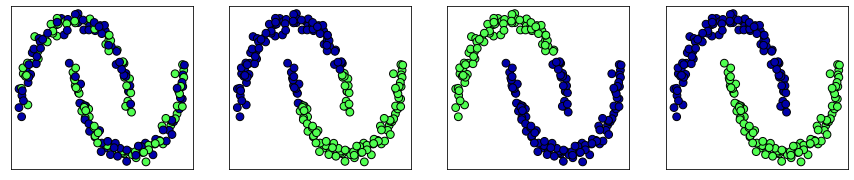

In [31]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(random_state=0, n_samples = 200, noise=0.05)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1,4,figsize=(15,3), subplot_kw={'xticks':(), 'yticks':()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]


random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X[:,0],X[:,1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
# axes[0]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')

In [28]:
axes[1:]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)